# Задание 1. Управление данными в R

Скопировать файл "QC#.txt" (# - номер варианта) из папки "DATA" в рабочую директорию (узнать путь к рабочей директории можно вызовом getwd() в консоли).   
Ввести данные из текстового файла согласно варианту (функция "read.table"). Сохранить в переменную qc (таблица данных).


In [1]:
qc = read.table("QC14.TXT")

Вывести размерность таблицы данных(dim).

In [2]:
dim(qc)

[1] 100   9

Вывести первые 3 записи таблицы (head).

In [3]:
head(qc, 3)

V1,V2,V3,V4,V5,V6,V7,V8,V9
56.08,10.58,4,2,1,4,18.417,47.685,2
57.00,9.00,1,3,1,2,19.140,46.800,4
56.93,10.57,5,1,2,4,18.477,51.330,3


Изменить имена переменных в таблице (names) согласно:
"б"-"kit", "п"-"nbug","№изг"-"maker","№пост"-"vendor","№вд"-"bug"
"н" - последовательно проименовать как "с1", "c2","c3","c4" (порядок переменных - согласно варианту).   
Вывести часть таблицы функцией head.

In [4]:
names(qc) = c("c1", "c2", "kit", "nbug", "maker", "vendor", "c3", "c4", "bug")
head(qc,3)

c1,c2,kit,nbug,maker,vendor,c3,c4,bug
56.08,10.58,4,2,1,4,18.417,47.685,2
57.00,9.00,1,3,1,2,19.140,46.800,4
56.93,10.57,5,1,2,4,18.477,51.330,3


Вывести общую статистику по переменной vendor (summary из Раздела 2).  Обращаться к переменной через "$".   

In [5]:
summary(qc$vendor)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.75    2.00    2.49    4.00    4.00 

Преобразовать vendor в переменную-фактор (c помощью as.factor, для доступа к переменной обратиться к столбцу с помощью оператора []).   
Вывести общую статистику для преобразованной переменной vendor (summary).   

In [6]:
qc[["vendor"]] = as.factor(qc[["vendor"]])
summary(qc[["vendor"]])

1  2  3  4 
25 28 20 27

Подсчитать количество изделий, у которых число дефектов больше 3 (функция sum и оператор условия).

In [7]:
sum(qc$nbug > 3)

[1] 11

Вывести наблюдение, для которого количество некретических дефектов равно максимальному (оператор [] к переменной qc, функция max).

In [8]:
qc[qc["nbug"] == max(qc["nbug"])]

[1] "53.93"  "57.19"  "10.16"  " 9.85"  "3"      "7"      "6"      "6"     
 [9] "2"      "1"      "1"      "1"      "18.006" "18.930" "47.535" "45.405"
[17] "3"      "3"

# Задание 2. Описательная статистика и графический анализ

Присоединить таблицу данных qc к списку текущих переменных (attach). Далее обращаться к именам переменных напрямую.   
Загрузить дополнительную библиотеку (для вычисления коэффициентов асимметрии и эксцесса).

In [9]:
install.packages('e1071', dependencies=TRUE)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'e1071' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"

In [10]:
attach(qc)
library("e1071")

Warning message:
"package 'e1071' was built under R version 3.6.3"

Вычислить среднее (mean) и медиану (median).

In [11]:
mean(c1)

[1] 55.0549

In [12]:
median(c1)

[1] 54.855

Вычислить выборочные квартили Q1,Q2,Q3 (quantile), а также интерквартильный размах с помощью указанной функции.

In [13]:
quantile(c1, probs=c(0.25,0.5,0.75))

25%     50%     75% 
53.6525 54.8550 56.5250

In [14]:
quantile(c1, probs=0.75) - quantile(c1, probs=0.25)

75% 
2.8725

Вывести комплексную статистику по переменной (summary).  

In [15]:
summary(c1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  49.68   53.65   54.85   55.05   56.52   59.94 

Вычислить дисперсию (var) для переменных с1 и  c1*2+100 в указанном порядке и сравнить результаты.

In [16]:
var(c1)

[1] 4.628207

In [17]:
var(c1 * 2 + 100)

[1] 18.51283

Вторая дисперсия больше в 4 раза

Построить гистограмму (hist).   

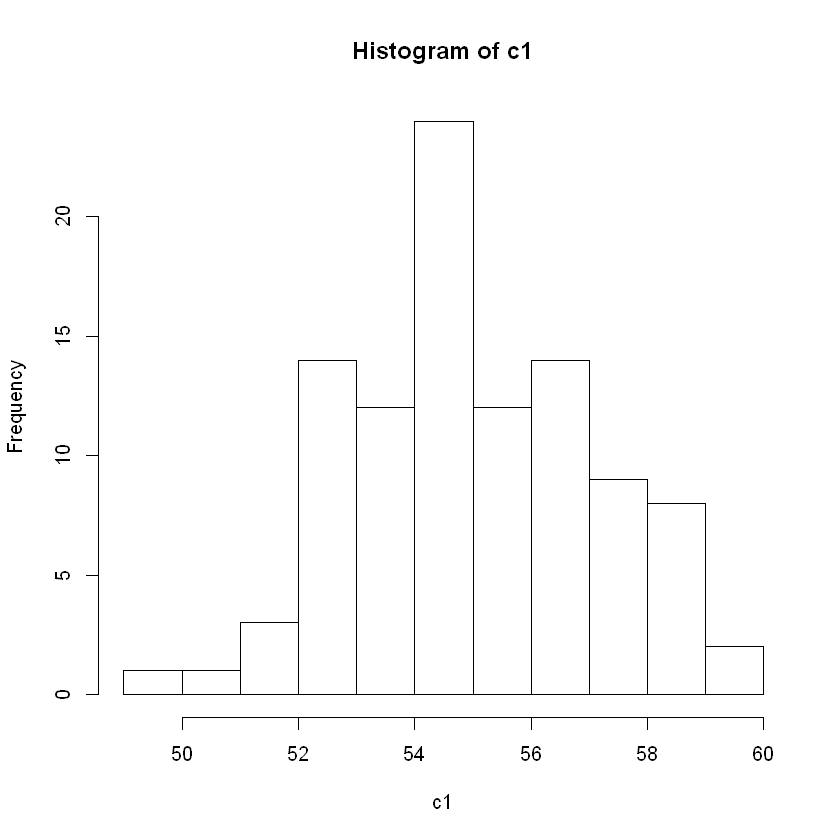

In [18]:
hist(c1, main="Histogram of c1")

Вывести асимметрию(skewness) и эксцесс (kurtosis) в указанном порядке.

In [19]:
skewness(c1)

[1] 0.03317255

In [20]:
kurtosis(c1)

[1] -0.4727926

функция плотности распределения асимметрична с положительной асимметрией

кривая распределения плосковершинна и имеет более тяжелые хвосты(Эксцесс отрицателен) по сравнению с нормальным распределением

Проверить нормальность остатков с помощью статистического теста Лиллиефорса (lillie.test - Раздел 2).

In [21]:
install.packages('nortest', dependencies=TRUE)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'nortest' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"

In [22]:
library('nortest')
lillie.test(c1)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  c1
D = 0.0772, p-value = 0.151


Гипотеза о нормальном распределении не отклоняется на уровне значимости 0.05. Вероятно, наблюдаемые значения асимметрии и эксцесса связаны с недостаточно большим объемом выборки

# Задание 3. Анализ статистических зависимостей

Перекодировать переменную kit так, чтобы она принимала только два значения: 1 и 2 (1 при kit<3, 2 - иначе).

In [23]:
kit = ifelse(kit<3, 1, 2)

In [24]:
kit

[1] 2 1 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 1 1 2 1 2 2 1 1 1 2 2 1
 [38] 2 1 2 1 1 2 1 2 2 1 1 2 1 1 2 2 2 1 2 1 2 1 2 2 2 1 1 1 2 2 2 1 1 2 2 1 2
 [75] 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 2 1 2 1 1 2 2 1 1 2 1

Вычислить ранговый коэффициент корреляции Спирмена (cor,method="spearman") для переменных kit и maker.

In [25]:
cor(kit, maker, method = "spearman")

[1] 0.08173077

Вывести таблицу сопряженности (table) по переменным kit и maker.  

In [26]:
table(kit, maker)

   maker
kit  1  2
  1 27 21
  2 25 27

#### Согласно ранговому коэффициенту корреляции и таблице сопряженности согласованность между переменными практически отсутствует.

Для переменных с1,с3 вычислить коэффициент корреляции с проверкой статистической значимости (cor.test). 

In [27]:
cor.test(c1, c3)


	Pearson's product-moment correlation

data:  c1 and c3
t = 21.001, df = 98, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8611169 0.9348641
sample estimates:
      cor 
0.9045418 


Вывести корреляционную матрицу по всем числовым характеристикам с1-c4 (cor). Для выбора нужных столбцов таблицы воспользоваться оператором "[]" (выбирается сразу несколько столбцов, последовательность индексов задается с помощью функции c - Раздел 1, таблицы данных).     
Между какими переменными есть значимая корреляция?  

In [28]:
cor(qc[c("c1", "c2", "c3", "c4")])

,c1,c2,c3,c4
c1,1.0000000,0.38674144,0.9045418,-0.20389934
c2,0.3867414,1.00000000,0.5060409,-0.09152175
c3,0.9045418,0.50604092,1.0000000,-0.19607400
c4,-0.2038993,-0.09152175,-0.1960740,1.00000000


#### Значимая корреляция наблюдается между с1 и с3 

Представить матрицу корреляции в более удобном виде(symnum, в качестве аргумента данной функции использовать результат функции cor).  

In [29]:
symnum(cor(qc[c("c1", "c2", "c3", "c4")]))

   c1 c2 c3 c4
c1 1          
c2 .  1       
c3 *  .  1    
c4          1 
attr(,"legend")
[1] 0 ' ' 0.3 '.' 0.6 ',' 0.8 '+' 0.9 '*' 0.95 'B' 1

Построить модель линейной регрессии для пары переменных, для которых коэффициент корреляции имеет наибольшее значение. Использовать функцию lm, зависимая переменная - с меньшим номером. Полученную модель сохранить в переменную linmod.   
Вывести общую статистику по модели (summary).

In [30]:
linmod = lm(c1~c3)
summary(linmod)


Call:
lm(formula = c1 ~ c3)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.36553 -0.60136 -0.01133  0.58398  2.86565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1747     2.3293   2.651  0.00936 ** 
c3            2.6748     0.1274  21.001  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.922 on 98 degrees of freedom
Multiple R-squared:  0.8182,	Adjusted R-squared:  0.8163 
F-statistic:   441 on 1 and 98 DF,  p-value: < 2.2e-16


#### Значимы (на уровне 0.05) коэффициенты при переменной c3 и константе

Построить диаграмму рассеяния (plot) с линией регрессии (abline) для переменных, которые участвуют в оцененной модели.

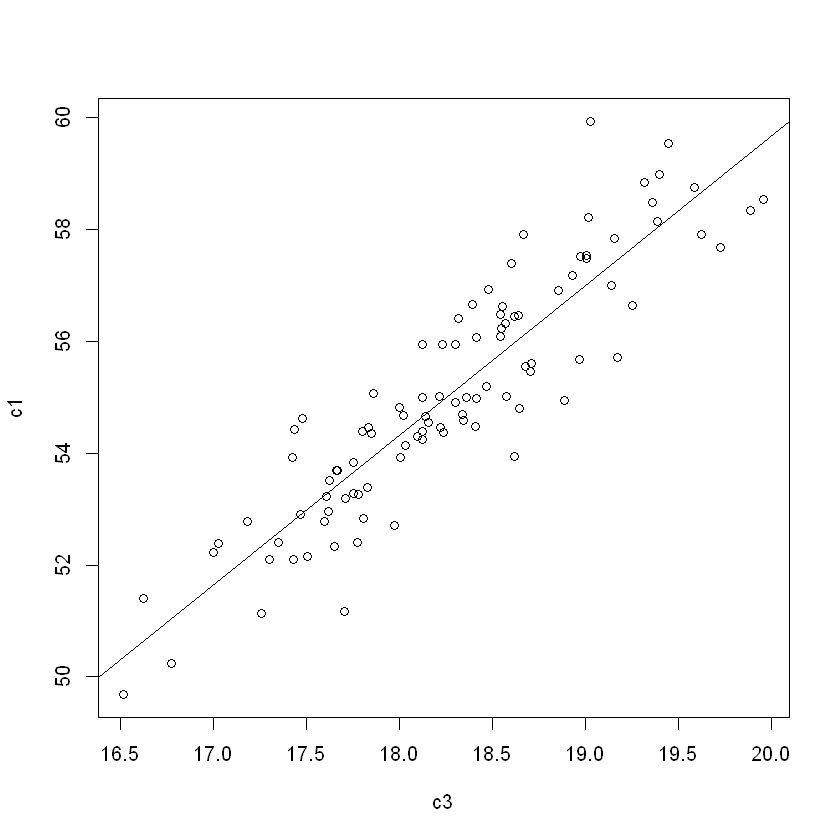

In [31]:
plot(c3, c1)
abline(linmod)

Вывести отдельно коэффициенты модели (coefficients). 

In [32]:
coefficients(linmod)

(Intercept)          c3 
   6.174723    2.674845

Сохранить значения остатков (residuals) модели linmod в переменную res. Построить график "Квантиль-квантиль" (qqnorm) для остатков.

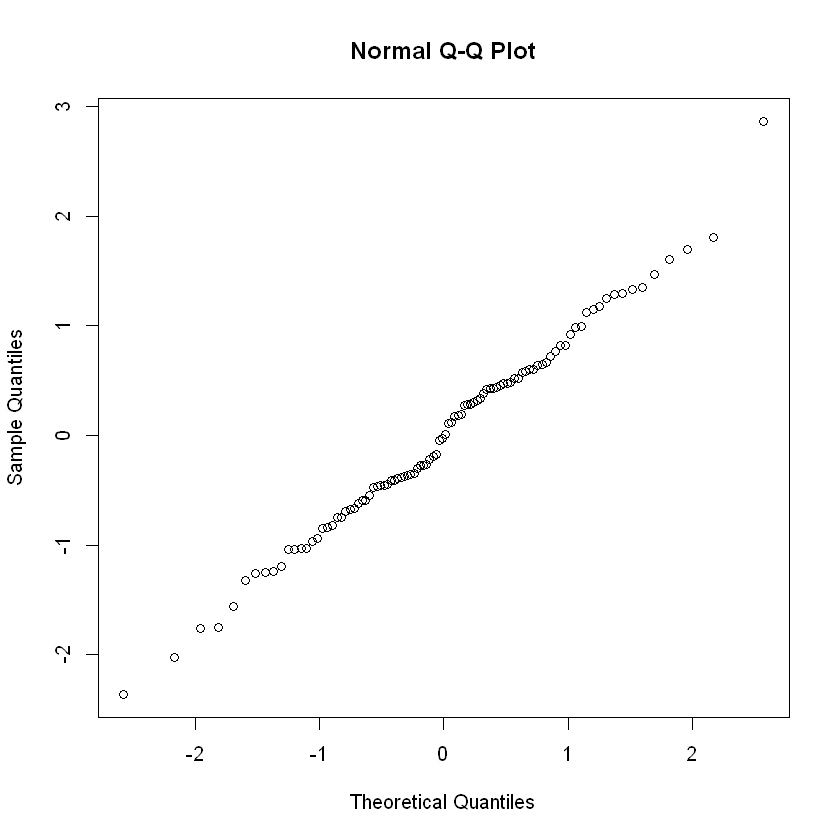

In [33]:
res = residuals(linmod)
qqnorm(res)

Проверить нормальность остатков с помощью статистического теста Колмогорова-Смирнова (ks.test - Раздел 2). 

In [34]:
ks.test(res, pnorm, mean=mean(res), sd=sd(res))


	One-sample Kolmogorov-Smirnov test

data:  res
D = 0.061976, p-value = 0.8371
alternative hypothesis: two-sided


### Критерий не отклоняет гипотезу о нормальном распределении на уровне значимости 0.05.

# Задание 4. Анализ неоднородных данных

Подсчитать частоты значений для переменной maker (table).  

In [35]:
table(maker)

maker
 1  2 
52 48 

Последовательно применить двухвыборочный t-критерий (t.test) к переменным c1,c2,c3,с4. Ввборки значений каждой переменной разделяются на две подвыборки  по значениям переменной maker (1 или 2).   
Вывести результаты (статистику по тесту) для той переменной (одной из c1,c2,c3,с4), для которой наблюдается значимое (на уровне 0.05) различие средних в двух подвыборках (значение p-value близко к нулю).     
Далее анализировать только выбранную переменную.

In [36]:
t.test(c1~maker)


	Welch Two Sample t-test

data:  c1 by maker
t = 2.1257, df = 95.385, p-value = 0.03611
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05966117 1.74524268
sample estimates:
mean in group 1 mean in group 2 
       55.48808        54.58563 


In [37]:
t.test(c2~maker)


	Welch Two Sample t-test

data:  c2 by maker
t = 1.8562, df = 97.066, p-value = 0.06646
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02409981  0.72044596
sample estimates:
mean in group 1 mean in group 2 
       10.08442         9.73625 


In [38]:
t.test(c3~maker)


	Welch Two Sample t-test

data:  c3 by maker
t = 2.1595, df = 95.771, p-value = 0.03331
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02501143 0.59429626
sample estimates:
mean in group 1 mean in group 2 
       18.42265        18.11300 


In [39]:
t.test(c4~maker)


	Welch Two Sample t-test

data:  c4 by maker
t = -5.036, df = 95.109, p-value = 2.253e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.913325 -1.265857
sample estimates:
mean in group 1 mean in group 2 
       48.03635        50.12594 


#### Гипотеза о равенстве средних в двух подвыборках отклоняется на уровне значимости 0.05 для переменной c4(средние значения характеристики c4 у двух производителей статистически различимы)

Построить "ящики с усами" для анализируемой переменной в разрезе по номеру производителя (maker).

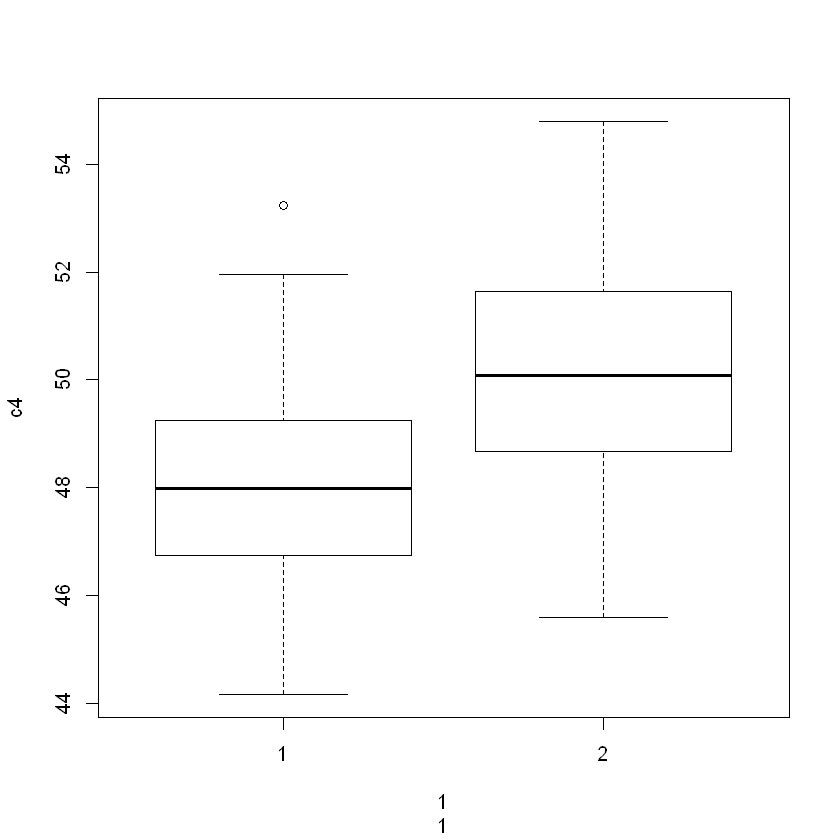

In [40]:
boxplot(c4~maker, xlab=maker)

Построить график ядерной оценки плотности распределения (density) для анализируемой переменной.  

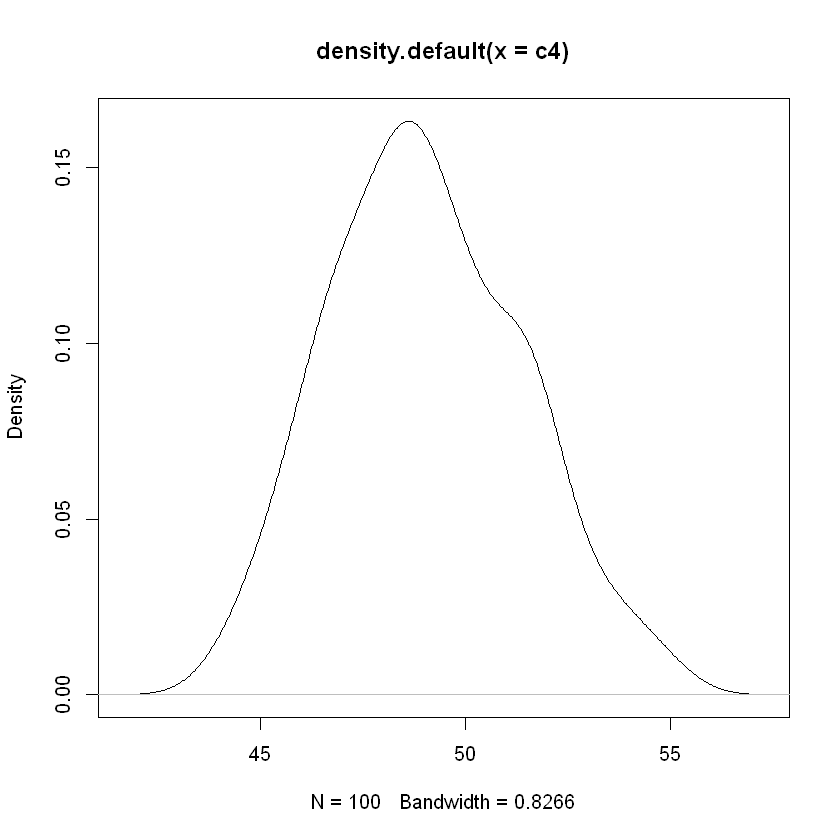

In [41]:
plot(density(c4), ylab = "Density")

# Задание 5. Классификация неоднородных данных

Построить диаграмму рассеяния (plot) для двух переменных, которые имеют наименьшую корреляцию (см. матрицу корреляции).

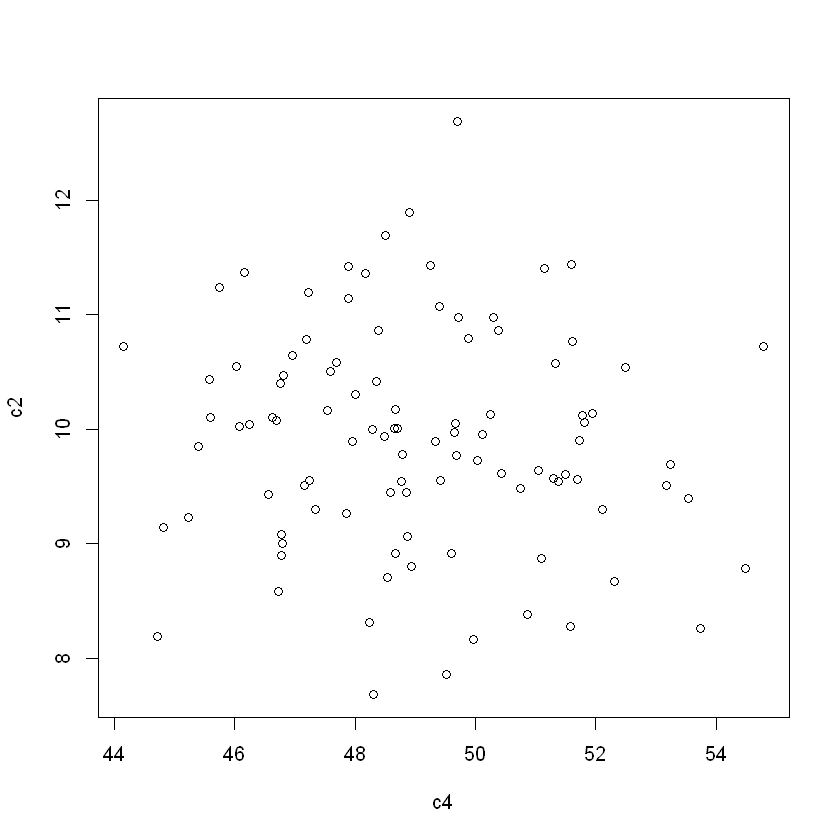

In [42]:
plot(c2~c4)

Объединить выбранные переменные в одну матрицу (cbind) и сохранить ее в новую переменную. Вывести первые три строки полученной матрицы (head). 

In [43]:
cdata = cbind(c2, c4)
head(cdata, 3)

c2,c4
10.58,47.685
9.00,46.800
10.57,51.330


Выполнить кластерный анализ (kmeans) с разбиением на два класса в пространстве выбранных переменных (kmeans). В качестве первого аргумента функции kmeans необходимо передавать матрицу, а второго - количество классов (2), на которое производится разбиение.   
Сохранить результаты в переменную kmres и вывести частоты наблюдений в каждом оцененном классе (table).

In [44]:
kmres = kmeans(cdata, 2)
table(kmres$cluster)


 1  2 
44 56 

Вывести график (plot) с легендой (legend), на котором должна быть обозначена классовая принадлежность каждого наблюдения различными символами (параметр pch).

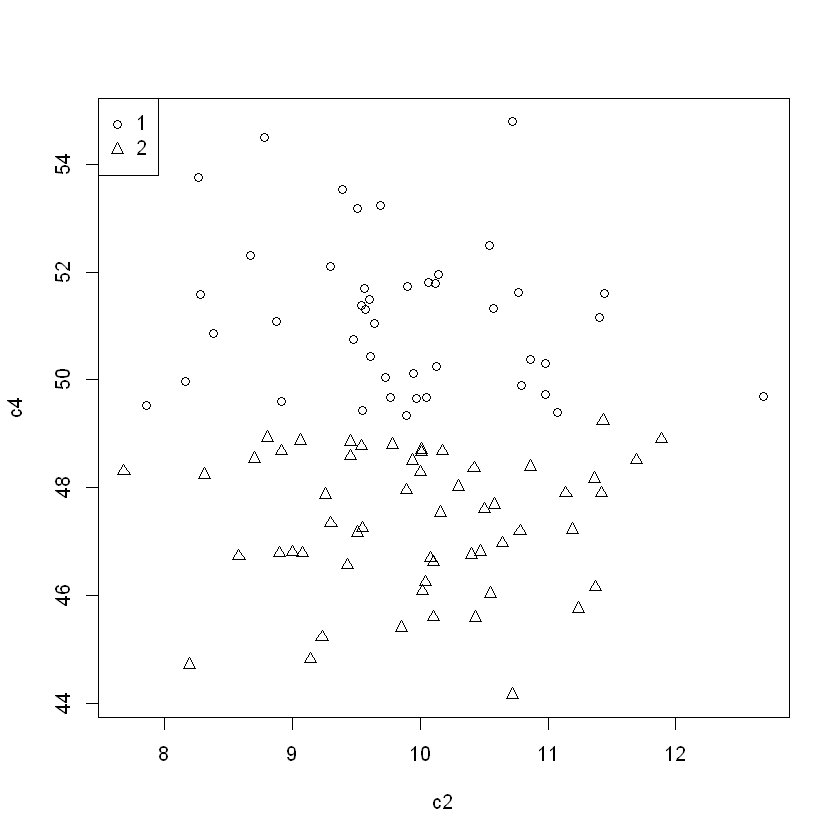

In [45]:
plot(cdata, pch=ifelse(kmres$cluster == 1, 1, 2))
legend("topleft", legend = c("1", "2"), pch = c(1, 2))

Отсоединить таблицу данных qc от списка текущих переменных (работа с данными закончена).

In [46]:
detach(qc)